In [31]:
#dementia

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

dementia = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\dementia.csv')

In [32]:
dementia.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL'],
      dtype='object')

In [33]:
dementia['DEMENTIA'].value_counts()

DEMENTIA
0    44745
1     3404
Name: count, dtype: int64

In [34]:
import pandas as pd

df_alzheimer = dementia[dementia['DEMENTIA'] == 1]
df_no_alzheimer = dementia[dementia['DEMENTIA'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):
 
    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):
        matched_controls = matched_controls.sample(n=len(group), random_state=42)
    
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

dementia = pd.concat([df_alzheimer, df_no_alzheimer_sampled])

In [35]:
dementia['DEMENTIA'].value_counts()

DEMENTIA
1    3404
0    3404
Name: count, dtype: int64

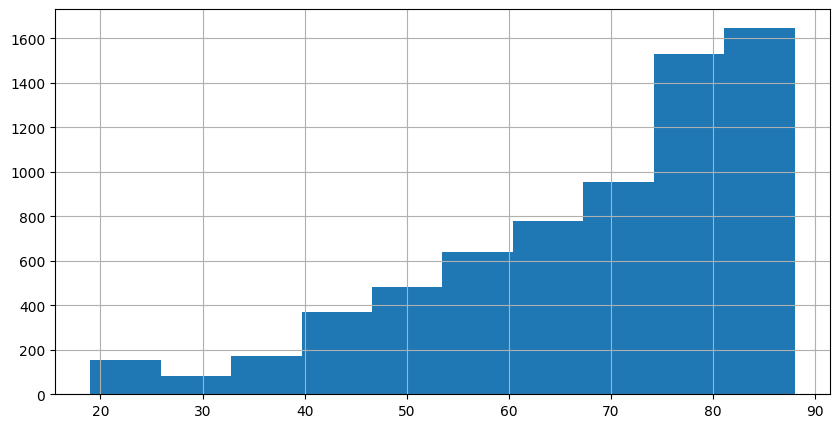

In [36]:
dementia['AGE'].hist(bins=10, figsize=(10, 5))
plt.show()

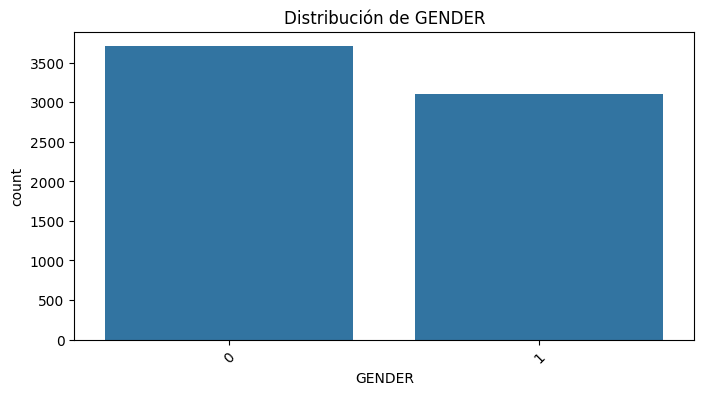

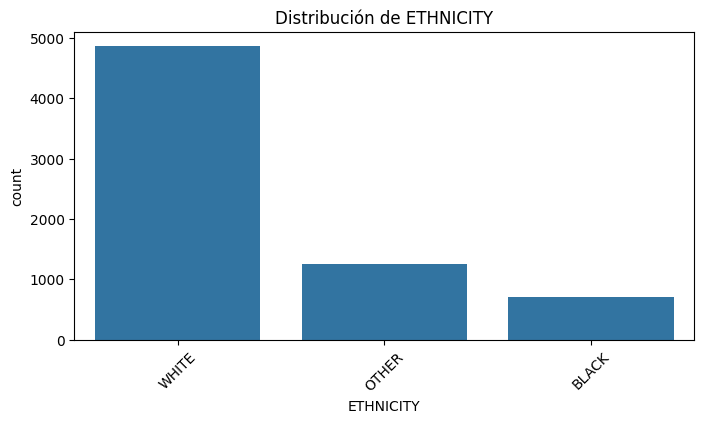

In [37]:
categorical_cols = ['GENDER', 'ETHNICITY']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=dementia, order=dementia[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

In [38]:
dementia.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL'],
      dtype='object')

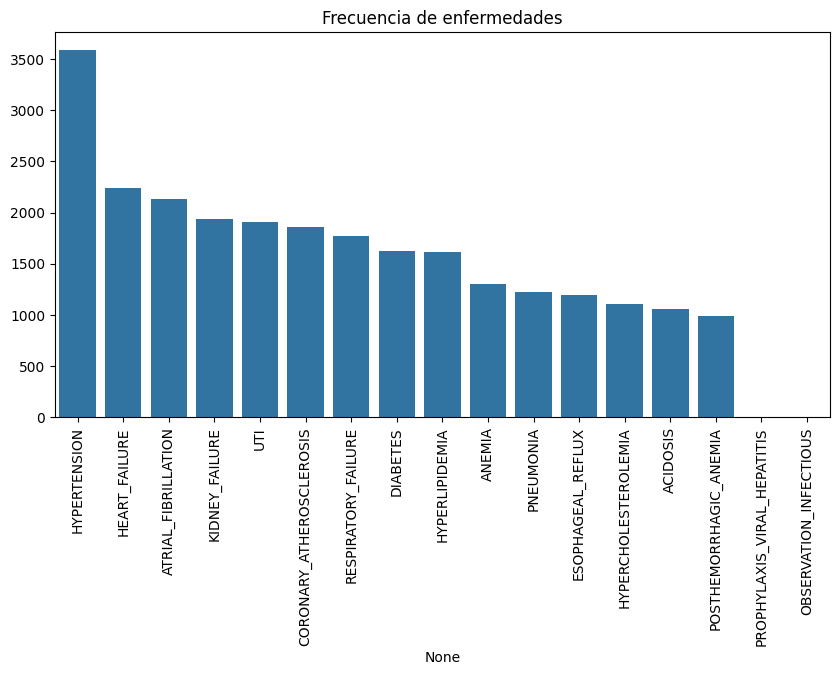

In [39]:
disease_cols = ['HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS']
disease_counts = dementia[disease_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de enfermedades")
plt.show()

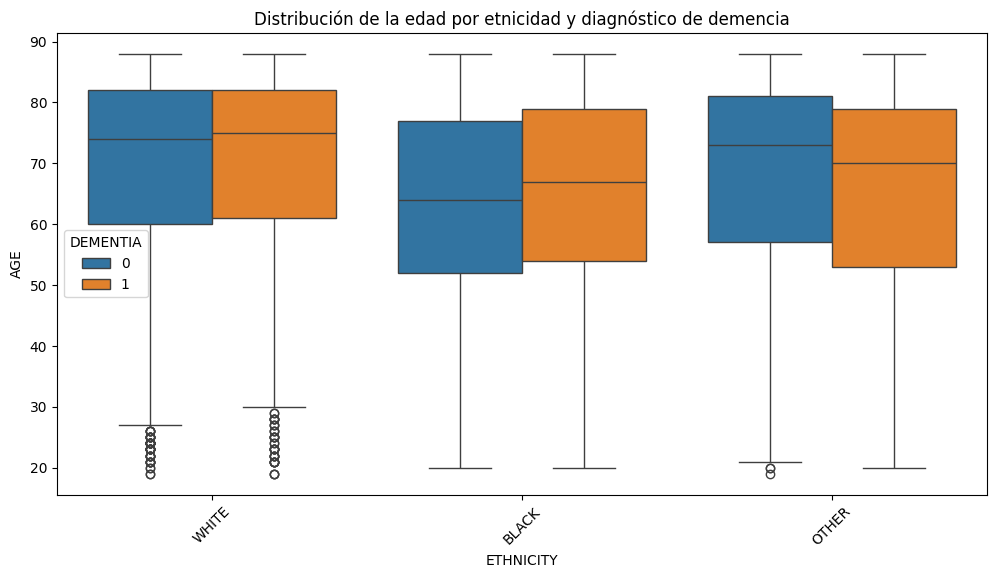

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ETHNICITY', y='AGE', hue='DEMENTIA', data=dementia)
plt.xticks(rotation=45)
plt.title("Distribución de la edad por etnicidad y diagnóstico de demencia")
plt.show()

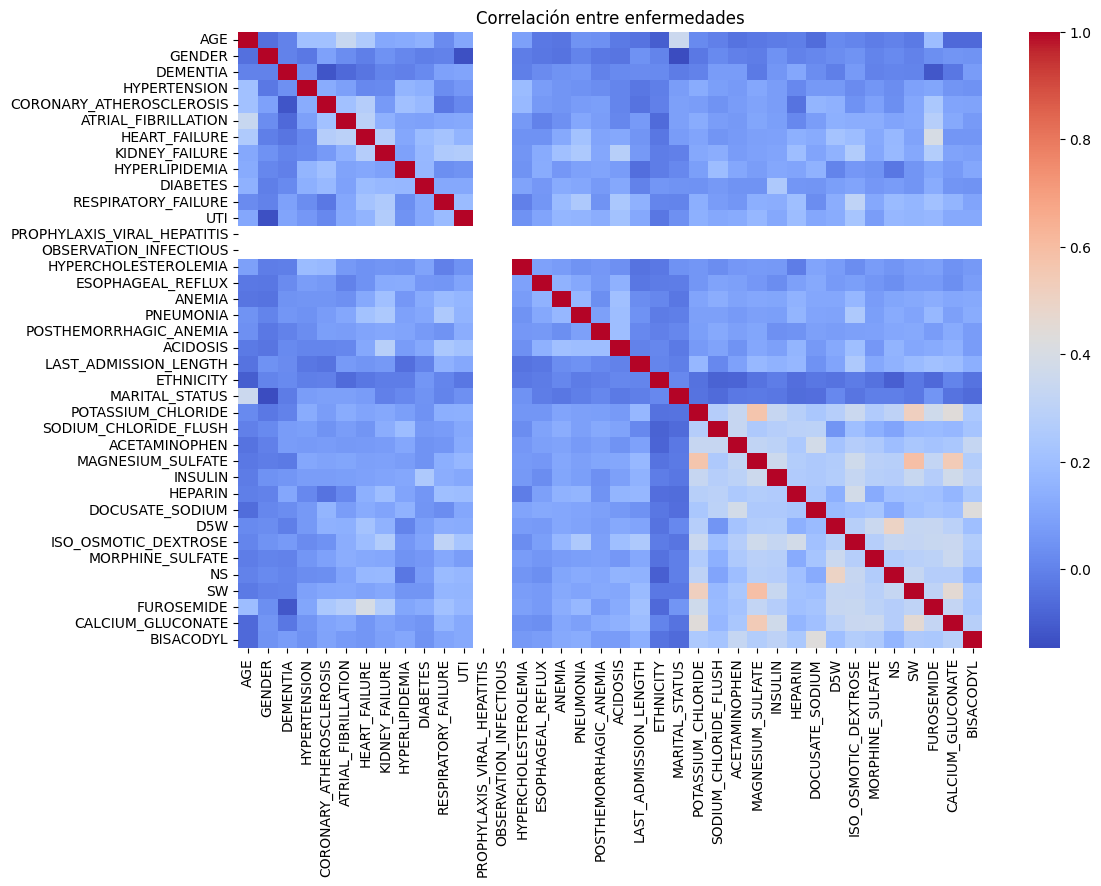

In [41]:
dementia['ETHNICITY'] = dementia['ETHNICITY'].map({'WHITE': 0, 'BLACK': 1, 'OTHER': 2})
dementia['MARITAL_STATUS'] = dementia['MARITAL_STATUS'].map({'UNMARRIED': 0, 'MARRIED': 1, 'OTHER': 2})

cols = ['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL']

plt.figure(figsize=(12, 8))
corr = dementia[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlación entre enfermedades")
plt.show()

In [43]:
# alzheimer

alzheimer = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\alzheimer.csv')

In [44]:
alzheimer['ALZHEIMER'].value_counts()

ALZHEIMER
0    47630
1      519
Name: count, dtype: int64

In [45]:
import pandas as pd

df_alzheimer = alzheimer[dementia['ALZHEIMER'] == 1]
df_no_alzheimer = alzheimer[alzheimer['ALZHEIMER'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):
 
    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):
        matched_controls = matched_controls.sample(n=len(group), random_state=42)
    
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

alzheimer = pd.concat([df_alzheimer, df_no_alzheimer_sampled])

In [48]:
alzheimer['ALZHEIMER'].value_counts()

ALZHEIMER
1    519
0    519
Name: count, dtype: int64

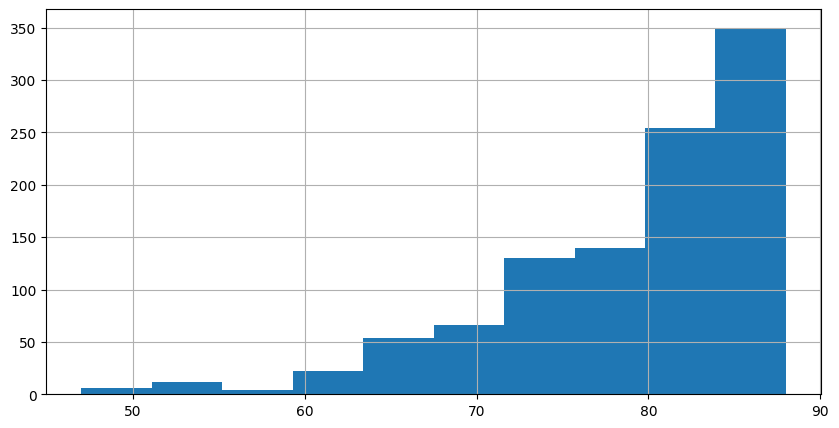

In [47]:
alzheimer['AGE'].hist(bins=10, figsize=(10, 5))
plt.show()

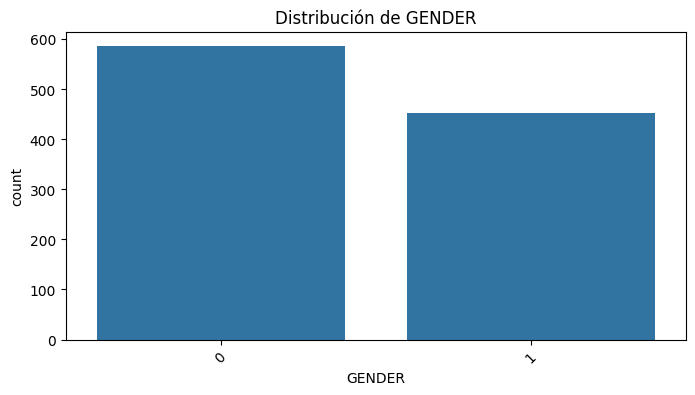

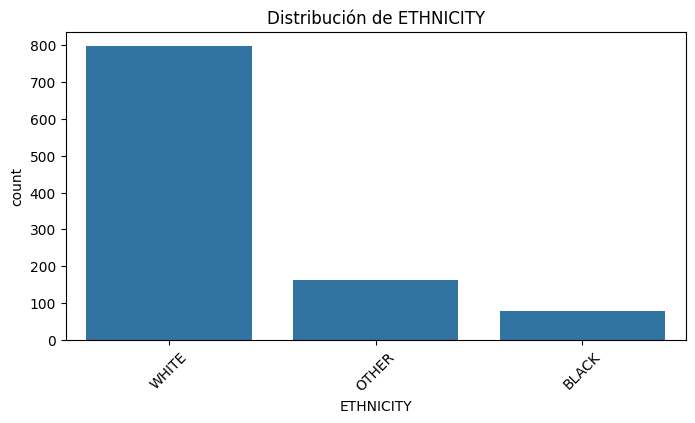

In [49]:
categorical_cols = ['GENDER', 'ETHNICITY']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=alzheimer, order=alzheimer[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

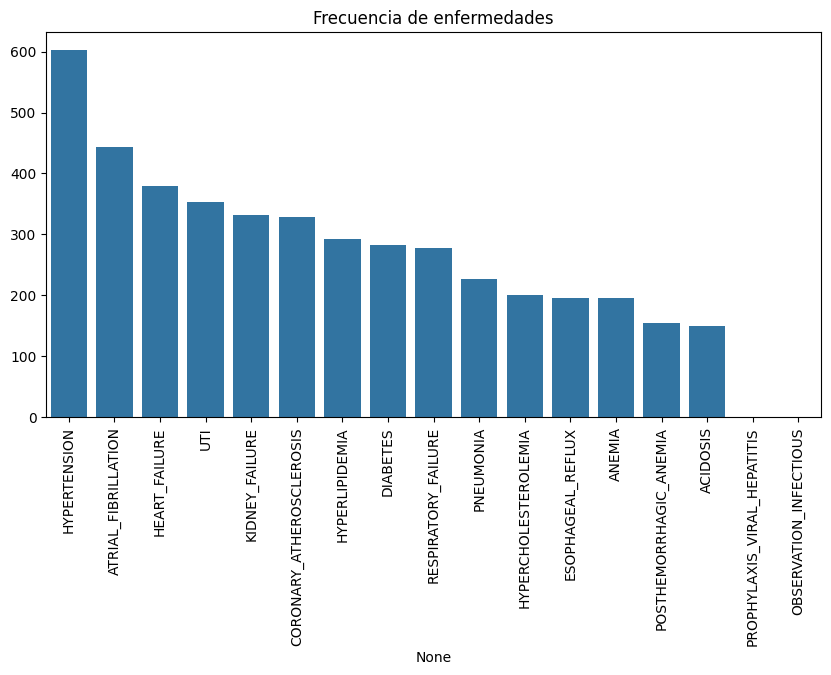

In [50]:
disease_cols = ['HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS']
disease_counts = alzheimer[disease_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de enfermedades")
plt.show()

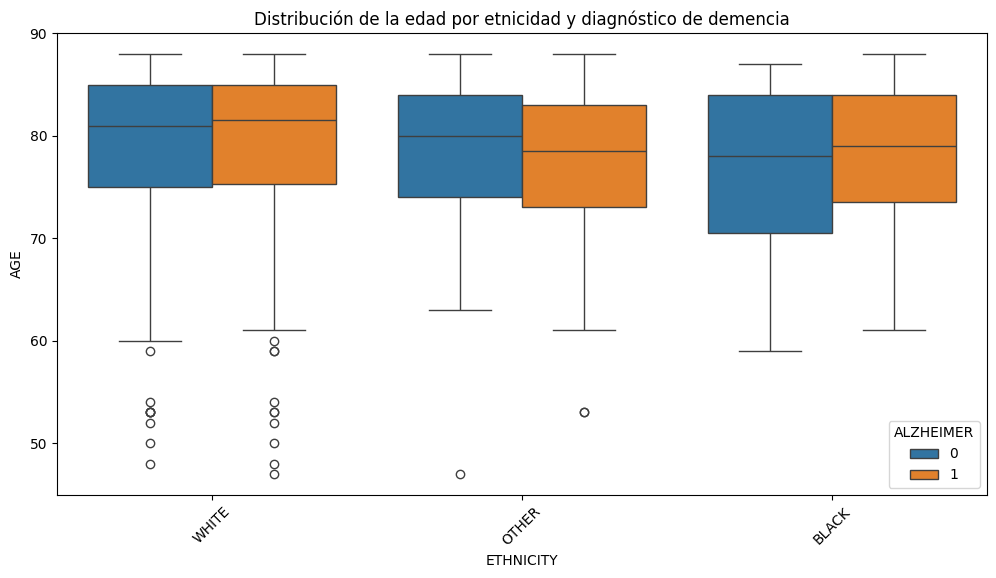

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ETHNICITY', y='AGE', hue='ALZHEIMER', data=alzheimer)
plt.xticks(rotation=45)
plt.title("Distribución de la edad por etnicidad y diagnóstico de demencia")
plt.show()

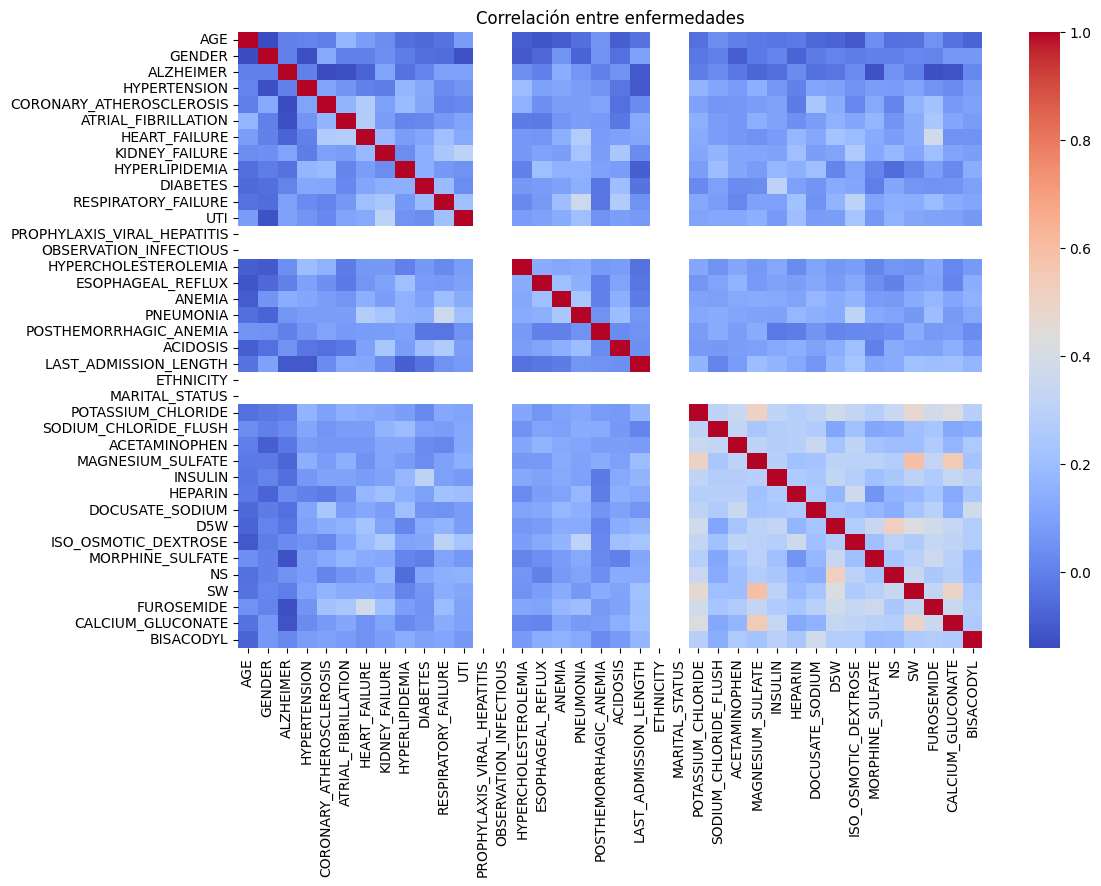

In [54]:
alzheimer['ETHNICITY'] = alzheimer['ETHNICITY'].map({'WHITE': 0, 'BLACK': 1, 'OTHER': 2})
alzheimer['MARITAL_STATUS'] = alzheimer['MARITAL_STATUS'].map({'UNMARRIED': 0, 'MARRIED': 1, 'OTHER': 2})

cols = ['AGE', 'GENDER', 'ALZHEIMER', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL']

plt.figure(figsize=(12, 8))
corr = alzheimer[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlación entre enfermedades")
plt.show()

In [56]:
# vital signs

vitalsigns = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\vitalsigns.csv')

df_alzheimer = vitalsigns[vitalsigns['DEMENTIA'] == 1]
df_no_alzheimer = vitalsigns[vitalsigns['DEMENTIA'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):
 
    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):
        matched_controls = matched_controls.sample(n=len(group), random_state=42)
    
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

vitalsigns = pd.concat([df_alzheimer, df_no_alzheimer_sampled])


In [57]:
vitalsigns

,AGE,GENDER,DEMENTIA,HYPERTENSION,CORONARY_ATHEROSCLEROSIS,ATRIAL_FIBRILLATION,HEART_FAILURE,KIDNEY_FAILURE,HYPERLIPIDEMIA,DIABETES,...,SW,FUROSEMIDE,CALCIUM_GLUCONATE,BISACODYL,HEART_RATE,RESPIRATORY_RATE,DIASTOLIC_BP,SYSTOLIC_BP,MEAN_BP,OXYGEN_SATURATION
0,24,0,1,0,0,0,0,1,0,0,...,1,1,1,1,131.0,40.0,197.0,193.0,269.0,100.0
1,77,0,1,0,0,0,1,0,0,0,...,1,0,1,1,101.0,26.0,113.0,98.0,169.0,100.0
2,70,0,1,0,0,0,0,1,0,0,...,0,0,1,1,95.0,30.0,159.0,119.0,220.0,100.0
3,68,0,1,0,1,0,1,1,1,1,...,1,1,1,1,77.0,26.0,110.0,90.0,229.0,100.0
4,72,0,1,0,0,0,1,0,1,1,...,1,0,1,0,125.0,33.0,99.0,75.0,175.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,81,0,0,1,1,1,1,1,1,0,...,1,1,1,1,146.0,56.0,151.0,148.0,189.0,100.0
65,83,1,0,1,1,1,1,0,0,0,...,1,1,1,1,72.0,30.0,63.0,56.0,132.0,98.0
336,85,0,0,1,1,1,1,1,1,0,...,0,1,0,1,94.0,31.0,99.0,92.0,138.0,98.0
144,86,0,0,1,1,1,1,0,1,0,...,1,1,1,1,142.0,37.0,93.0,89.0,118.0,100.0


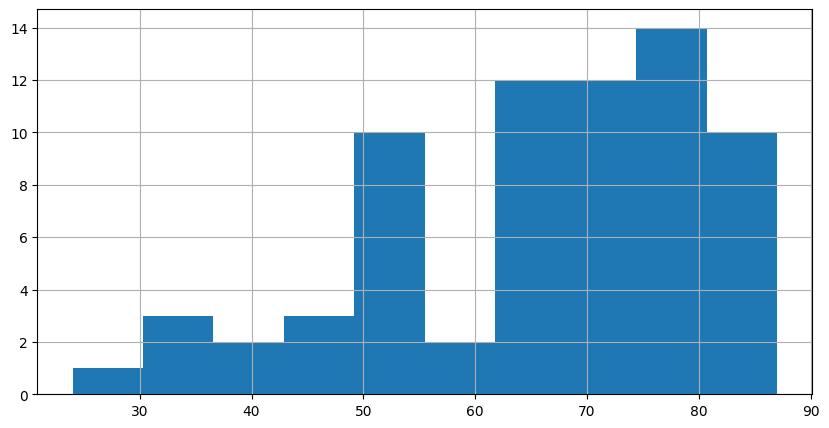

In [58]:
vitalsigns['AGE'].hist(bins=10, figsize=(10, 5))
plt.show()

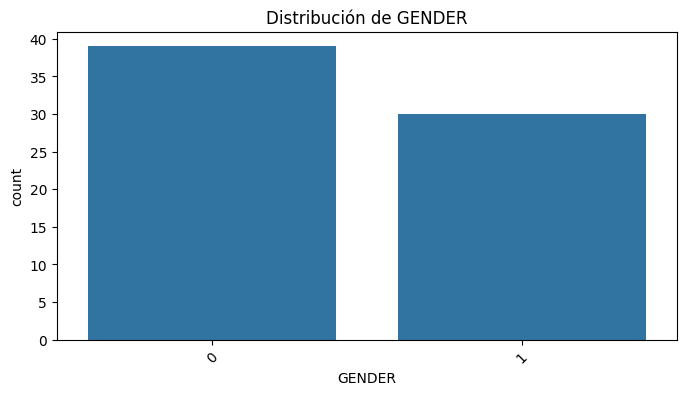

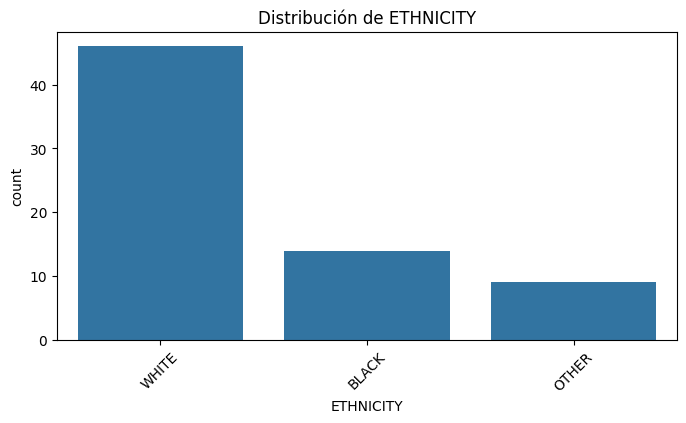

In [60]:
categorical_cols = ['GENDER', 'ETHNICITY']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=vitalsigns, order=vitalsigns[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

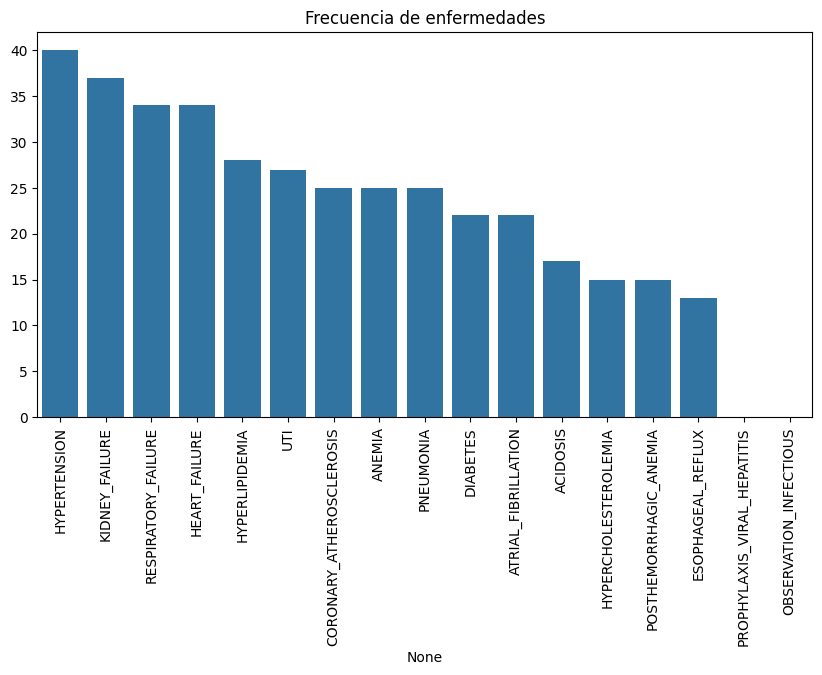

In [61]:
disease_cols = ['HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS']
disease_counts = vitalsigns[disease_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.title("Frecuencia de enfermedades")
plt.show()

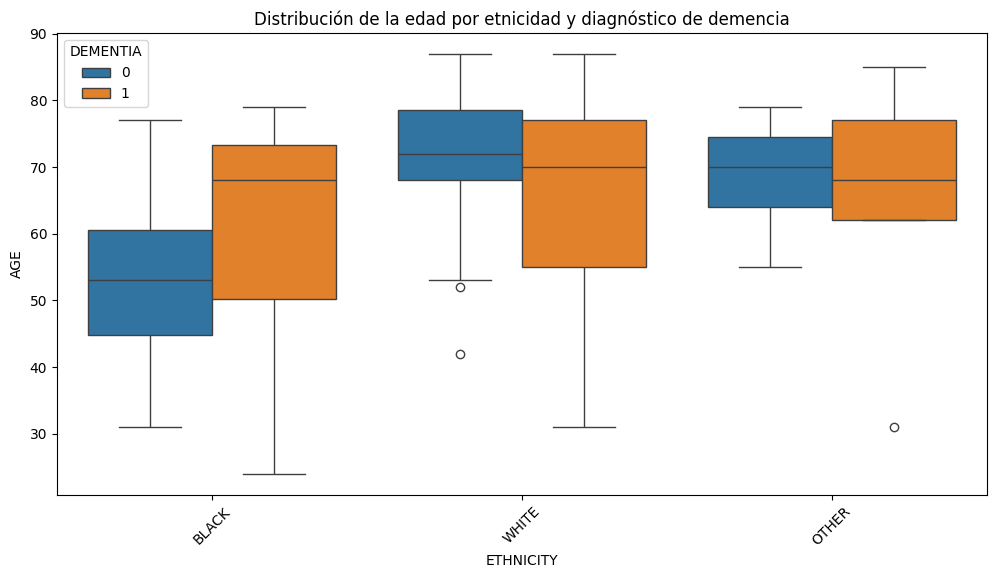

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ETHNICITY', y='AGE', hue='DEMENTIA', data=vitalsigns)
plt.xticks(rotation=45)
plt.title("Distribución de la edad por etnicidad y diagnóstico de demencia")
plt.show()

In [63]:
vitalsigns.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL', 'HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION'],
      dtype='object')

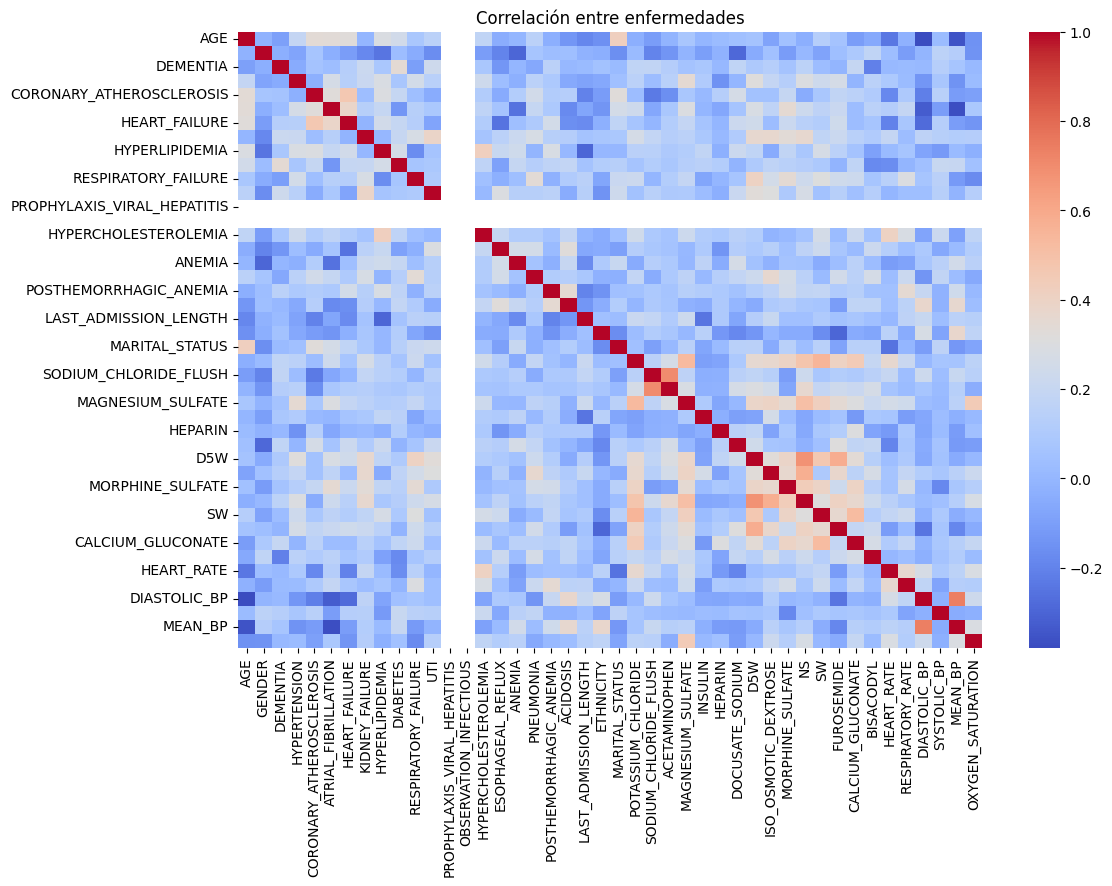

In [64]:
vitalsigns['ETHNICITY'] = vitalsigns['ETHNICITY'].map({'WHITE': 0, 'BLACK': 1, 'OTHER': 2})
vitalsigns['MARITAL_STATUS'] = vitalsigns['MARITAL_STATUS'].map({'UNMARRIED': 0, 'MARRIED': 1, 'OTHER': 2})

cols = ['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL', 'HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION']

plt.figure(figsize=(12, 8))
corr = vitalsigns[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlación entre enfermedades")
plt.show()

In [65]:
vitalsigns.columns

Index(['AGE', 'GENDER', 'DEMENTIA', 'HYPERTENSION', 'CORONARY_ATHEROSCLEROSIS',
       'ATRIAL_FIBRILLATION', 'HEART_FAILURE', 'KIDNEY_FAILURE',
       'HYPERLIPIDEMIA', 'DIABETES', 'RESPIRATORY_FAILURE', 'UTI',
       'PROPHYLAXIS_VIRAL_HEPATITIS', 'OBSERVATION_INFECTIOUS',
       'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX', 'ANEMIA', 'PNEUMONIA',
       'POSTHEMORRHAGIC_ANEMIA', 'ACIDOSIS', 'LAST_ADMISSION_LENGTH',
       'ETHNICITY', 'MARITAL_STATUS', 'POTASSIUM_CHLORIDE',
       'SODIUM_CHLORIDE_FLUSH', 'ACETAMINOPHEN', 'MAGNESIUM_SULFATE',
       'INSULIN', 'HEPARIN', 'DOCUSATE_SODIUM', 'D5W', 'ISO_OSMOTIC_DEXTROSE',
       'MORPHINE_SULFATE', 'NS', 'SW', 'FUROSEMIDE', 'CALCIUM_GLUCONATE',
       'BISACODYL', 'HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION'],
      dtype='object')

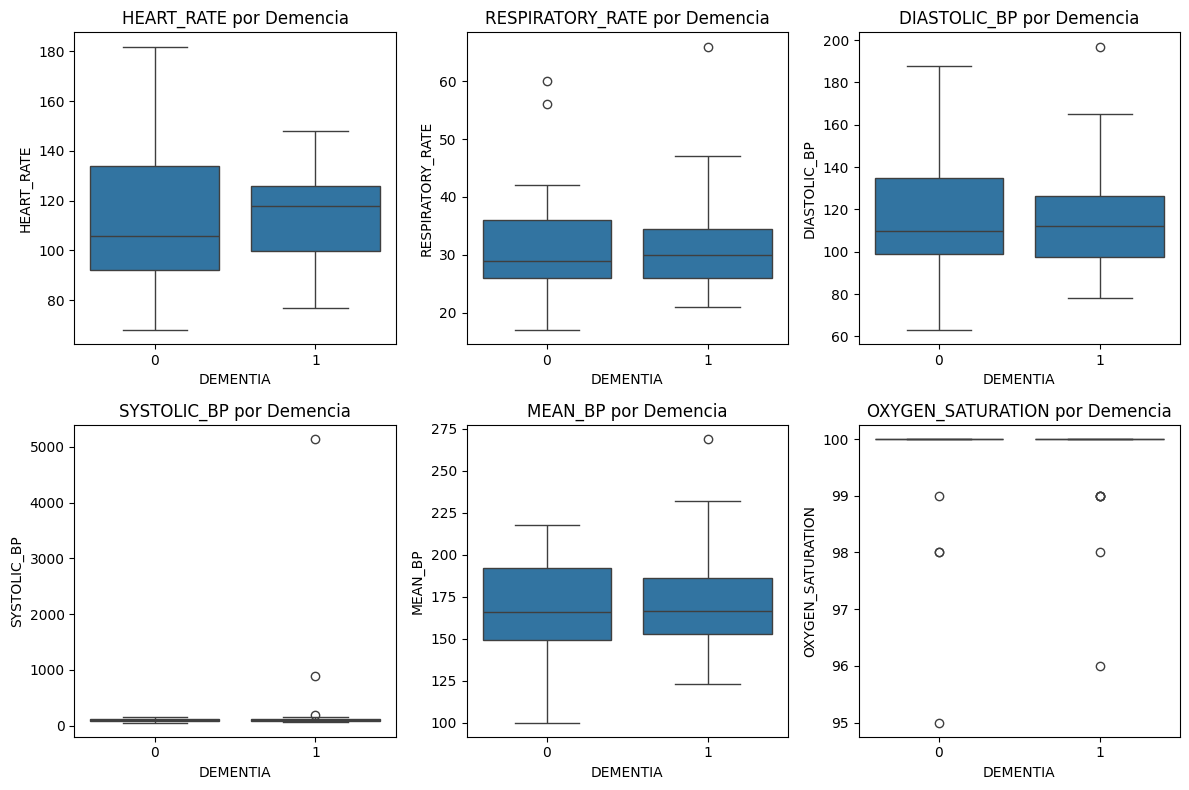

In [66]:
vital_signs = ['HEART_RATE', 'RESPIRATORY_RATE', 'DIASTOLIC_BP', 'SYSTOLIC_BP', 'MEAN_BP', 'OXYGEN_SATURATION']

plt.figure(figsize=(12, 8))
for i, col in enumerate(vital_signs, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=vitalsigns, x='DEMENTIA', y=col)
    plt.title(f'{col} por Demencia')

plt.tight_layout()
plt.show()


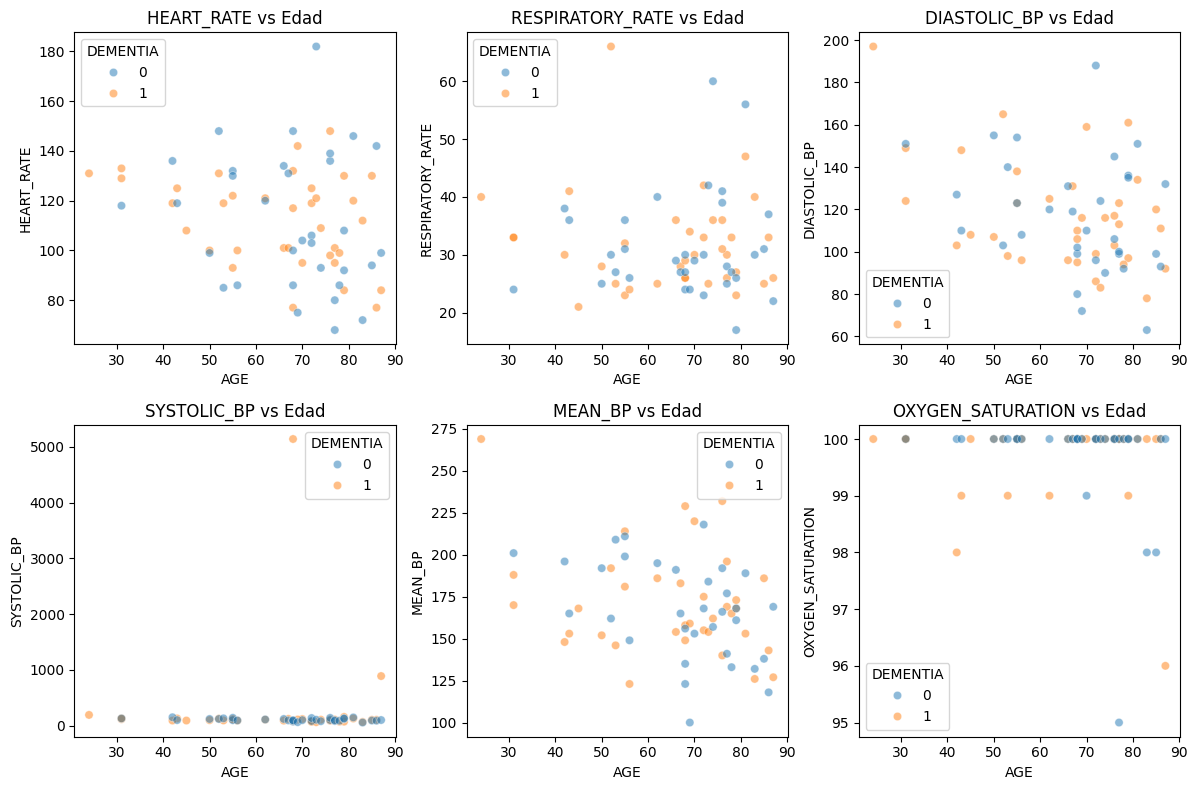

In [67]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(vital_signs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=vitalsigns, x='AGE', y=col, hue='DEMENTIA', alpha=0.5)
    plt.title(f'{col} vs Edad')

plt.tight_layout()
plt.show()


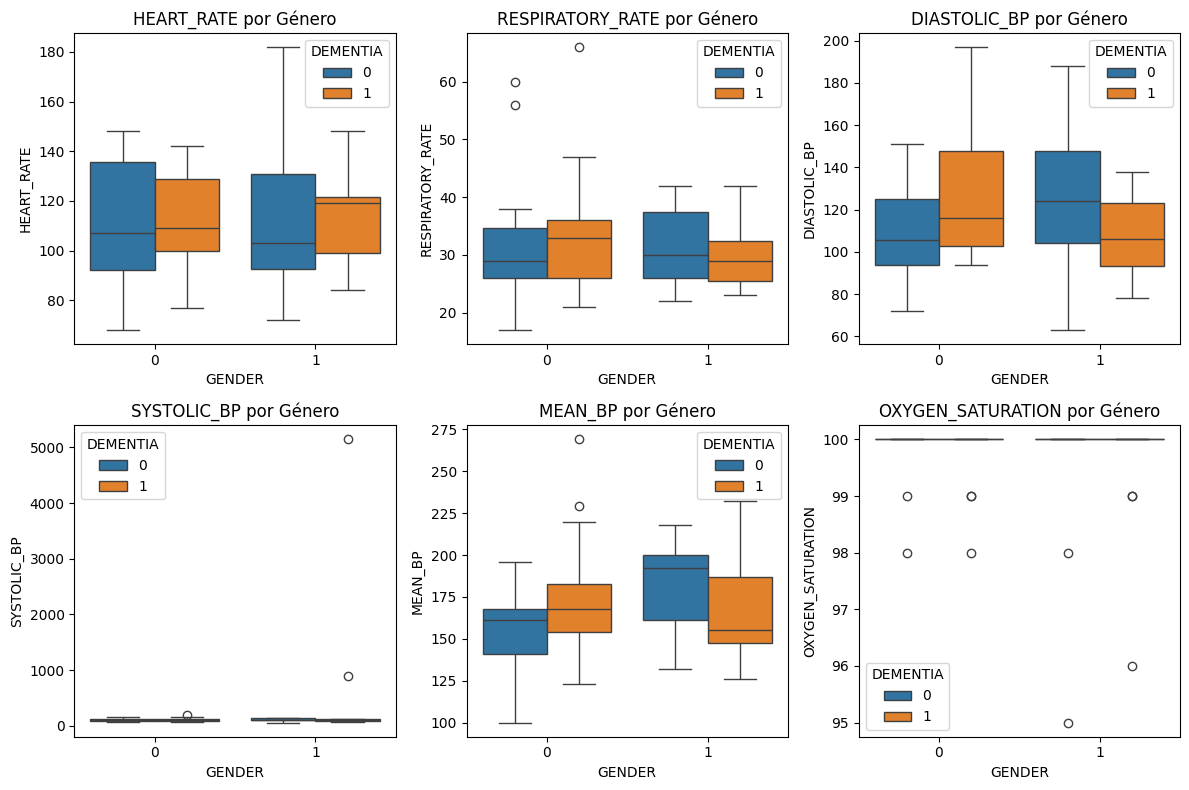

In [68]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(vital_signs, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=vitalsigns, x='GENDER', y=col, hue='DEMENTIA')
    plt.title(f'{col} por Género')

plt.tight_layout()
plt.show()


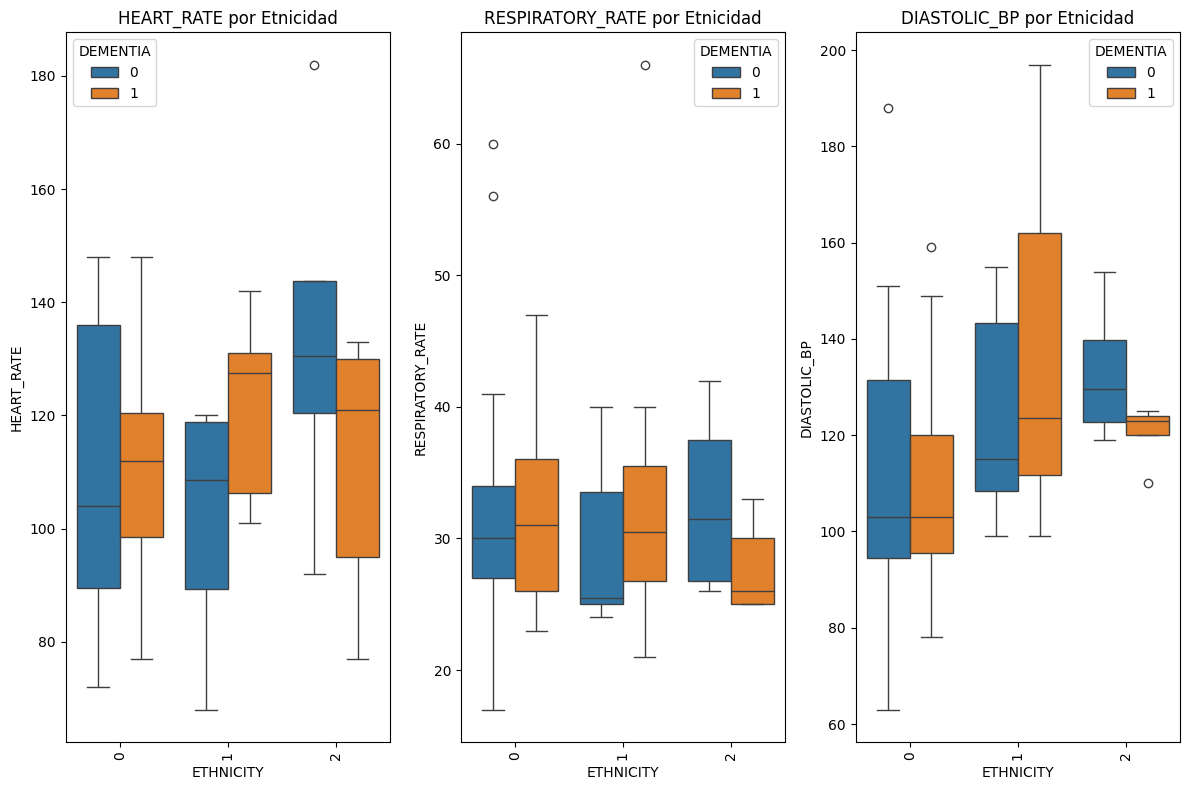

In [69]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(vital_signs[:3], 1):  # Para evitar gráficos sobrecargados
    plt.subplot(1, 3, i)
    sns.boxplot(data=vitalsigns, x='ETHNICITY', y=col, hue='DEMENTIA')
    plt.xticks(rotation=90)
    plt.title(f'{col} por Etnicidad')

plt.tight_layout()
plt.show()


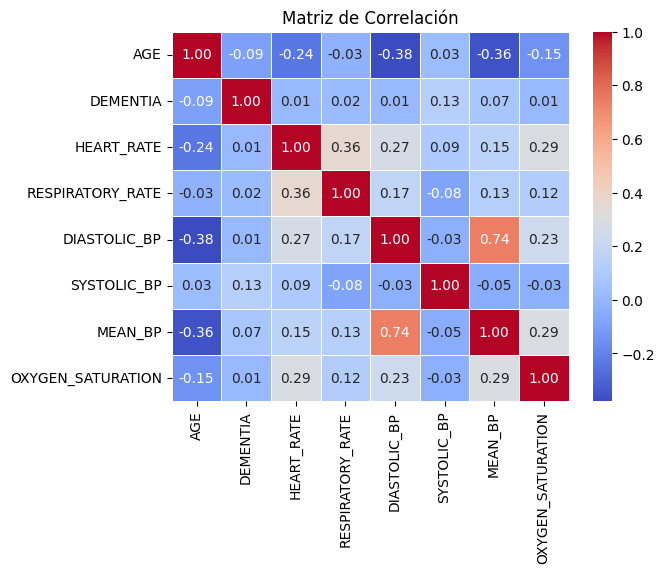

In [ ]:
corr_matrix = vitalsigns[['AGE', 'DEMENTIA'] + vital_signs].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show() # hem carrego systolic i diastolic/mean

In [79]:
# pitt dataset

pitt = pd.read_csv('C:\\Users\\lclai\\Desktop\\data_dementia\\clean\\pitt_clean.csv')
pitt = pitt[(pitt['label'] == 0) | (pitt['label'] == 1)]


In [80]:
pitt.columns

Index(['subject', 'age', 'sex', 'label', 'transcript', 'clean_transcripts'], dtype='object')

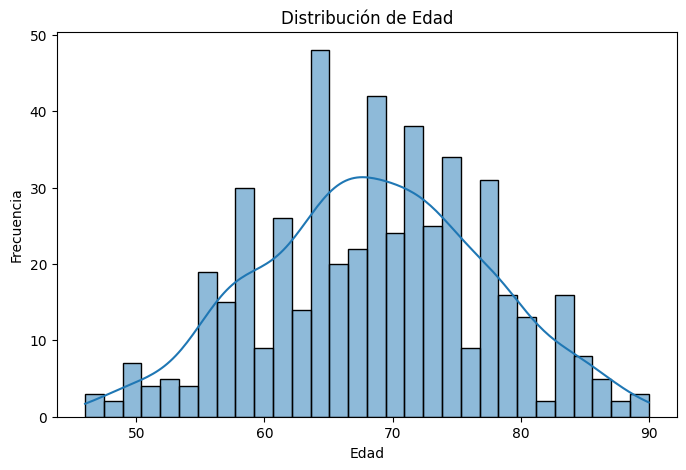

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(pitt['age'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


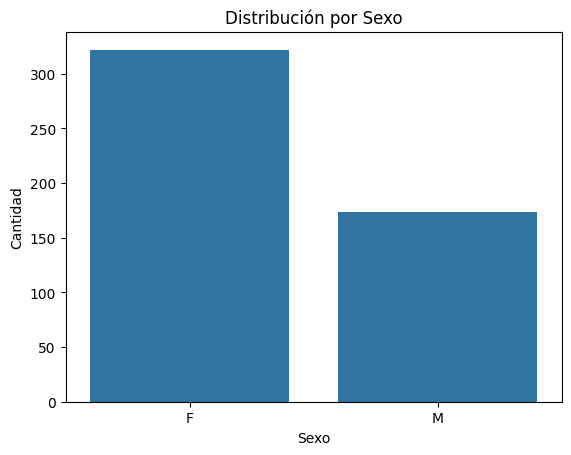

In [82]:
sns.countplot(data=pitt, x='sex')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()


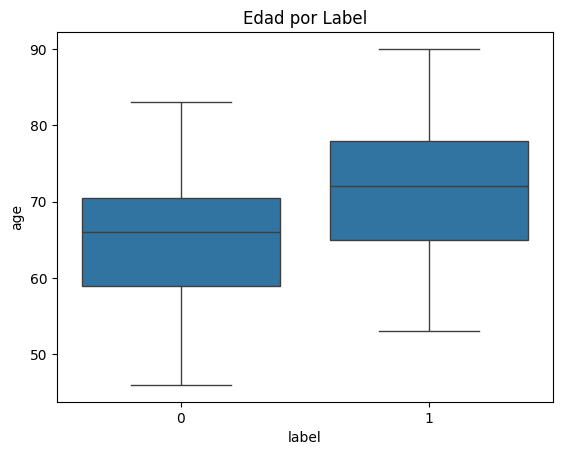

In [83]:
sns.boxplot(data=pitt, x='label', y='age')
plt.title('Edad por Label')
plt.show()


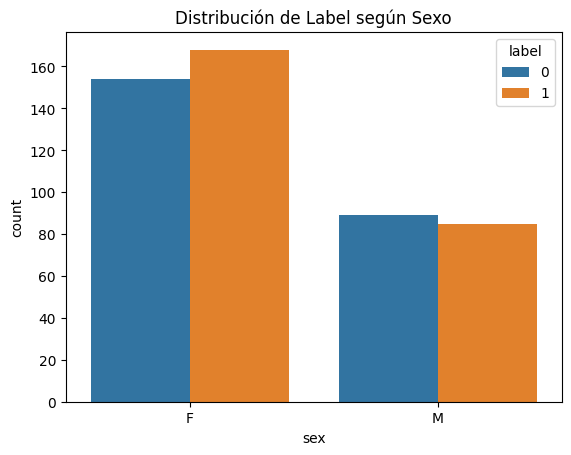

In [84]:
sns.countplot(data=pitt, x='sex', hue='label')
plt.title('Distribución de Label según Sexo')
plt.show()
